In [1]:
from scipy import spatial
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import gseapy as gp
import os
%matplotlib inline
plt.rcParams['pdf.fonttype']=42

In [2]:
# Set output folder, subfolder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)
if not os.path.exists(os.path.join(output_folder,"figure_panels")):
    os.makedirs(os.path.join(output_folder,"figure_panels"), exist_ok=True)

In [3]:
# Import the HeLa DMEM gene-level profiles
df_gene_DMEM = pd.read_csv("../Profile_Aggregation/outputs/20210422_6W_CP257_guide_normalized_feature_select_median_merged_ALLBATCHES___DMEM___ALLWELLS_gene_aggregated.csv.gz")

# Figure 6A

In [4]:
df_gene_DMEM = df_gene_DMEM.dropna()
DMEM_gene_np = df_gene_DMEM.iloc[:,1:].to_numpy()

# Calculate pairwise correlations against query
gene='TMEM251'

gene_correlations = []
labels = df_gene_DMEM.iloc[:,0].tolist()
query_np = df_gene_DMEM.loc[df_gene_DMEM['Metadata_Foci_Barcode_MatchedTo_GeneCode']==gene].iloc[:,1:].to_numpy().ravel()
for i in range(len(labels)):
    gene_correlations.append((labels[i],1-spatial.distance.cosine(query_np,DMEM_gene_np[i])))

# Perform GSEA
my_rank = pd.DataFrame(gene_correlations, columns =['Gene', 'Cosine'])
pre_res = gp.prerank(rnk=my_rank, gene_sets='GO_Cellular_Component_2021',
                     threads=4,
                     permutation_num=100, # reduce number to speed up testing
                     outdir=output_folder, format='png', seed=6)

# Load results
res = pd.read_csv(os.path.join(output_folder,'gseapy.gene_set.prerank.report.csv'))
res.loc[res['NES']<.01]
res['-log_fdr'] = -np.log10(res['NES'])
res = res.dropna().sort_values('NES',ascending=False).reset_index(drop=True)
res.head(10)

/Users/eweisbar/miniconda3/envs/periscope_2022/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,-log_fdr
0,prerank,vacuolar proton-transporting V-type ATPase com...,0.869468,2.640441,0.000000,0.000000,0.00,11/19,1.84%,ATP6V1G1;ATP6V1C1;ATP6V1B2;ATP6V1E1;ATP6V1F;AT...,-0.421676
1,prerank,proton-transporting V-type ATPase complex (GO:...,0.844126,2.457679,0.000000,0.000000,0.00,8/15,1.84%,ATP6V1G1;ATP6AP1;ATP6V1D;ATP6V1F;ATP6V0D1;ATP6...,-0.390525
2,prerank,Golgi cisterna membrane (GO:0032580),0.690875,2.096527,0.000000,0.000000,0.00,12/26,5.23%,GOLGA8S;GOLGA8F;GOLGA8H;GOLGA8T;GOLGA6C;GOLGA8...,-0.321501
3,prerank,Golgi cis cisterna (GO:0000137),0.673614,1.945498,0.000000,0.002238,0.01,15/25,12.50%,GOLGA8S;GOLGA8F;GOLGA8H;GOLGA8T;GOLGA6C;GOLGA8...,-0.289031
4,prerank,ion channel complex (GO:0034702),0.552146,1.809496,0.000000,0.023274,0.12,13/35,16.10%,CHRNA7;CHRNB2;CHRNA4;CHRFAM7A;CHRNA3;SHISA9;TR...,-0.257558
5,prerank,vacuolar membrane (GO:0005774),0.480011,1.806018,0.011765,0.019395,0.12,9/45,1.93%,ATP6V1G1;ATP6V1F;ATP6V0D1;ATP6AP2;ARL8B;VPS4A;...,-0.256722
6,prerank,phagocytic vesicle membrane (GO:0030670),0.484438,1.683457,0.000000,0.079285,0.41,11/44,4.80%,ATP6V0B;ATP6V0C;ATP6V0D1;PIK3C3;RAB7A;ATP6V0A1...,-0.226202
7,prerank,Golgi cisterna (GO:0031985),0.470972,1.647112,0.010989,0.101824,0.50,14/52,5.23%,GOLGA8S;B4GALT1;GOLGA8F;GOLGA8H;GOLGA8T;GOLGA6...,-0.216723
8,prerank,Cul2-RING ubiquitin ligase complex (GO:0031462),0.529606,1.597854,0.014085,0.149192,0.72,7/19,12.05%,FEM1B;ELOB;ASB4;PRAME;ZSWIM4;ELOC;CUL2,-0.203537
9,prerank,cis-Golgi network (GO:0005801),0.427294,1.560675,0.000000,0.210361,0.84,16/57,9.69%,GOLGA8S;GOLGA8F;GOLGA8H;GOLGA8T;GOLGA6C;GOLGA8...,-0.193312


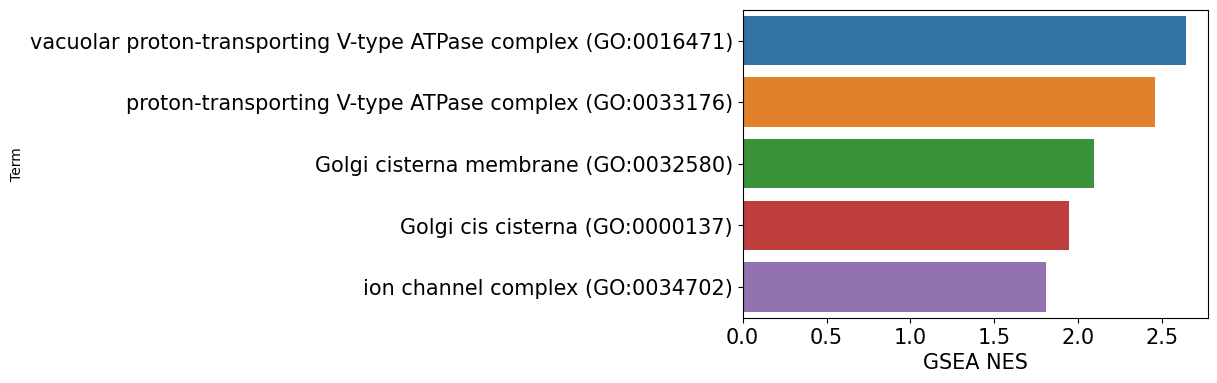

In [5]:
# Generate barplot
fig = plt.figure(figsize=(6,4))
sns.barplot(data=res.head(5),y='Term',x='NES',label='big')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('GSEA NES',fontsize=15)
plt.savefig(os.path.join(output_folder, "figure_panels", "Figure_7A_TMEM251_GO_CC.pdf"),bbox_inches='tight')

# Figure 6B

SLC35A2
WDR7
ATP6V1G1
UGP2
ATP6AP1
GNPTAB
VPS11
ATP6V1E1
GNPTG


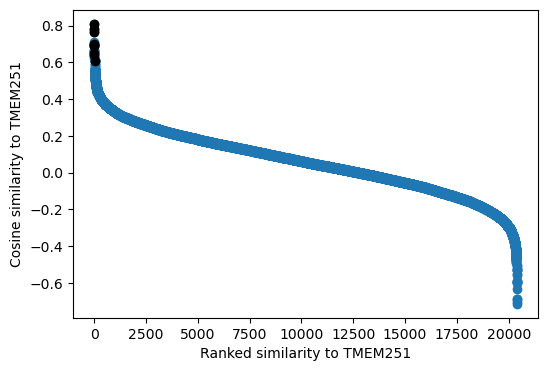

In [6]:
gene_correlations.sort(key=lambda x:x[1],reverse=True)
rnk=[]
x=[]
y=[]
for n,i in enumerate(gene_correlations):
    rnk.append(i[0])
    y.append(i[1])
    x.append(n)

# Generate waterfall plot
fig = plt.figure(figsize=(6,4))
plt.scatter(x[1:],y[1:])
plt.xlabel('Ranked similarity to {}'.format(gene))
plt.ylabel('Cosine similarity to {}'.format(gene))
include=['GNPTAB','GNPTG','WDR7','VPS11','UGP2','ATP6V1G1','ATP6AP1','ATP6V1E1','SLC35A2']
count=0
for i in range(len(x)):
    if rnk[i] in include:
        plt.scatter(x[i],y[i],c='k')
        print(rnk[i])
plt.savefig(os.path.join(output_folder, "figure_panels", "Figure_7B_TMEM251_waterfall.pdf"))